In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **VGG16 Feature Extraction Model**

In [1]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet data
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Remove the last max pooling layer
feature_output = base_model.get_layer('block5_conv3').output

# Create the final model for feature extraction without the last max pooling layer
feature_extraction_model = Model(inputs=base_model.input, outputs=feature_output)

# Display the architecture of the model
feature_extraction_model.summary()


2024-04-26 10:57:01.608812: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-26 10:57:01.608932: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-26 10:57:01.757282: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# LOADING THE CLASSIFIER MODELS

In [2]:
import joblib

# Load the saved model from the file
svm = joblib.load('/kaggle/input/slem-stack/keras/v1/1/svm_clf_stacking.pkl')
logreg = joblib.load('/kaggle/input/slem-stack/keras/v1/1/log_reg_clf_stacking.pkl')
xgb = joblib.load('/kaggle/input/slem-stack/keras/v1/1/xgb_clf_stacking.pkl')
mlp = joblib.load('/kaggle/input/slem-stack/keras/v1/1/meta_clf_stacking.pkl')

# FINAL MODEL FOR CLASSIFICATION

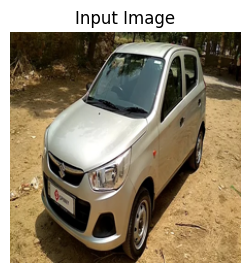

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
(1, 14, 14, 512)
(1, 100352)
Ensemble Prediction: [2]
Predicted label is Car
Scan the below QR code to pay your parking charge


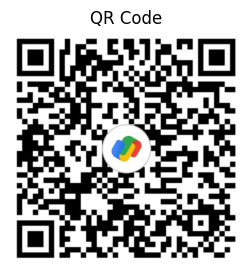

In [11]:
import numpy as np
from PIL import Image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
from joblib import Parallel, delayed
from sklearn.neural_network import MLPClassifier

# Load and preprocess the image
image_path = '/kaggle/input/car-image/car.jpg'
img = Image.open(image_path)
img = img.convert("RGB")
img = img.resize((224, 224))  # VGG16 input size
img_array = np.array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Plot the image
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.title("Input Image")
plt.axis('off')
plt.show()

#Extract features using vgg16 model
feature = feature_extraction_model.predict(img_array) 
flattened_feature = feature.reshape(feature.shape[0], -1)

print(feature.shape)
print(flattened_feature.shape)

# Scale probabilities from logistic regression
log_reg_weight = 4  # Giving more weight to logistic regression predictions

# svm_pred = svm.predict(flattened_feature)
# log_pred = logreg.predict(flattened_feature)
# # Make predictions on test set using base classifiers
svm_pred = svm.predict_proba(flattened_feature)
log_reg_pred= logreg.predict_proba(flattened_feature)
xgb_pred = xgb.predict_proba(flattened_feature)

# # Scale probabilities from logistic regression for test set
log_reg_pred_scaled = log_reg_weight * log_reg_pred

# Stack test predictions horizontally
stacked_pred = np.column_stack((svm_pred, log_reg_pred_scaled, xgb_pred))

# Make predictions using meta classifier
y_pred = mlp.predict(stacked_pred)

# Display the result
print(f"Ensemble Prediction: {y_pred}")

#Display QR code
if y_pred == 0:
    print("Predicted label is Auto")
    img = '/kaggle/input/qrcode/10rs.jpg'
elif y_pred == 1:
    print("Predicted label is Bus")
    img = '/kaggle/input/qrcode/30rs.jpg'
elif y_pred == 2:
    print("Predicted label is Car")
    img = '/kaggle/input/qrcode/20rs.jpg'
else:
    print("Predicted label is Lorry")
    img = '/kaggle/input/qrcode/30rs.jpg'

print("Scan the below QR code to pay your parking charge")

img = Image.open(img)
# Plot the image
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.title("QR Code")
plt.axis('off')
plt.show()

